In [1]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random
from datetime import datetime
import numpy as np
import os

In [2]:
DATASET_URL = "./car.data"
FEATURES = [
	"buying",
	"maint",
	"doors",
	"persons",
	"lug_boot",
	"safety"
]
LABEL = "evaluation"
COLUMNS = FEATURES + [LABEL]
DTYPE={
	"buying": "category",
	"maint": "category",
	"doors": "category",
	"persons": "category",
	"lug_boot": "category",
	"safety": "category",
	"evaluation": "category"
}
TEST_SET_SIZE=0.2
SHUFFLE_SIZE=1024
BATCH_SIZE=50
SEED=1
COLUMNS

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'evaluation']

In [3]:
tf.random.set_seed(SEED)
random.seed(SEED)

In [4]:
data = pd.read_csv(os.path.join(os.path.abspath(os.getcwd()), DATASET_URL), names=COLUMNS, dtype=DTYPE, index_col=False, skipinitialspace=True)
data.head()

,buying,maint,doors,persons,lug_boot,safety,evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   buying      1728 non-null   category
 1   maint       1728 non-null   category
 2   doors       1728 non-null   category
 3   persons     1728 non-null   category
 4   lug_boot    1728 non-null   category
 5   safety      1728 non-null   category
 6   evaluation  1728 non-null   category
dtypes: category(7)
memory usage: 12.8 KB


In [6]:
# Missing values
data = data.dropna()
data.isna().sum()

buying        0
maint         0
doors         0
persons       0
lug_boot      0
safety        0
evaluation    0
dtype: int64

In [22]:
# # Normalise Features
# for feature in FEATURES:
#     if data[feature].dtype == "float32":
#         # min_max_scaler = preprocessing.MinMaxScaler()
#         # data[[feature]] = min_max_scaler.fit_transform(data[[feature]])
#         standard_scaler = preprocessing.StandardScaler()
#         data[[feature]] = standard_scaler.fit_transform(data[[feature]])

# data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,150.000000,1.500000e+02,1.500000e+02
mean,-4.793207e-09,0.000000,-1.030664e-08,3.469177e-09
std,1.003350e+00,1.003350,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987,-1.568735e+00,-1.444450e+00
25%,-9.006813e-01,-0.587764,-1.227541e+00,-1.181504e+00
50%,-5.250584e-02,-0.124958,3.362660e-01,1.332259e-01
75%,6.745013e-01,0.569251,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684,1.786341e+00,1.710902e+00


In [7]:
# Set categories
for column in COLUMNS:
	if data[column].dtype.name == "category":
		labelencoder = preprocessing.LabelEncoder()
		data[column] = labelencoder.fit_transform(data[column])
		categories=data[column].unique()
		data[column] = data[column].astype(pd.CategoricalDtype(categories=categories))
		print(data[column].cat.categories.tolist())

[3, 0, 2, 1]
[3, 0, 2, 1]
[0, 1, 2, 3]
[0, 1, 2]
[2, 1, 0]
[1, 2, 0]
[2, 0, 3, 1]


In [8]:
data = data.astype(dtype=DTYPE)
data.dtypes

buying        category
maint         category
doors         category
persons       category
lug_boot      category
safety        category
evaluation    category
dtype: object

In [9]:
# Class Balance
data[LABEL].value_counts()

2    1210
0     384
1      69
3      65
Name: evaluation, dtype: int64

In [10]:
data[LABEL].nunique()

4

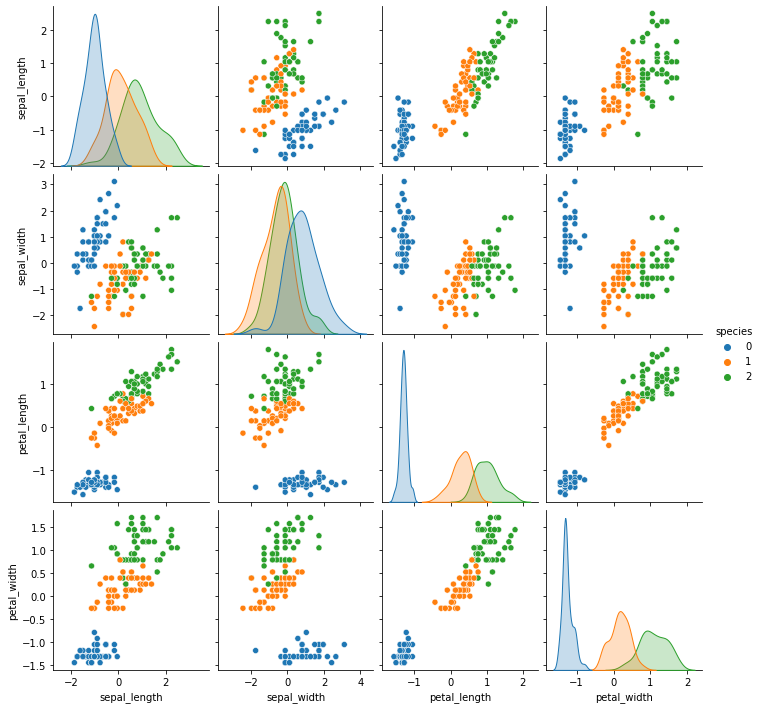

In [27]:
# sns.pairplot(data.sample(n=150, random_state=1), hue=LABEL)

In [11]:
target = data.pop(LABEL)
target

0       2
1       2
2       2
3       2
4       2
       ..
1723    1
1724    3
1725    2
1726    1
1727    3
Name: evaluation, Length: 1728, dtype: category
Categories (4, int64): [2, 0, 3, 1]

In [12]:
data = pd.get_dummies(data, dtype="float32")
data

,buying_3,buying_0,buying_2,buying_1,maint_3,maint_0,maint_2,maint_1,doors_0,doors_1,...,doors_3,persons_0,persons_1,persons_2,lug_boot_2,lug_boot_1,lug_boot_0,safety_1,safety_2,safety_0
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1724,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1725,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1726,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [13]:
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=TEST_SET_SIZE)

# Set training dataset
train = tf.data.Dataset.from_tensor_slices(
		(train_x.values, train_y.values))
train = train.shuffle(
		SHUFFLE_SIZE,
		seed=SEED
)
train = train.batch(BATCH_SIZE)

# Set testing dataset
test = tf.data.Dataset.from_tensor_slices(
		(test_x.values, test_y.values))
test = test.shuffle(
		SHUFFLE_SIZE,
		seed=SEED
)
test = test.batch(BATCH_SIZE)